<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Rossmann-Sales-Prediction-/blob/main/ML_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#Import Important Libraries.

#Data Import

In [ ]:
#Basic platform Libraries
import numpy as np
import pandas as pd
#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
#ML Algo Libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import model_selection

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#Data set csv Files location. 
File1="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of store.csv"

#Using Machine Learning to predict sales.
Without proper sales forecasting, many business decisions are based on unreliable estimates or instinct – which leads to many inefficiencies and missed opportunities. with forecating we can answer Questions like.
* How much stock should be ordered? 
* How much revenue can be expected in upcoming Year.? 

#What is sales forecasting?

* A sales forecast is an estimation of future sales. This estimation can be based on past values, economic indicators, seasonality, weather forecasts, promo, Assortment of product etc.

**Lets explore the dataset and coin out the features those will help our Model to predict the Sales of Rossmann stores with best Accuracy.**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Load Rossmann store Data set.
df0=pd.read_csv(File1)
#Load store Data set.
df1=pd.read_csv(File2,index_col="Store")

#Exploring Data sets.

**1** **Rossmann Data set**

In [ ]:
#Rossmann Data frame
print("(Rows, Columns)=",df0.shape)
df0.sample(1116)

(Rows, Columns)= (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
307291,944,5,2014-10-17,6228,1018,1,0,0,0
881935,756,4,2013-05-02,20548,2781,1,1,0,0
181658,1029,4,2015-02-19,6070,859,1,1,0,0
569870,891,4,2014-02-06,7865,1046,1,1,0,0
940888,614,7,2013-03-10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
86886,1032,5,2015-05-15,9966,1021,1,0,0,1
1429,315,4,2015-07-30,4723,496,1,1,0,1
173002,178,4,2015-02-26,8840,850,1,0,0,0
122671,22,7,2015-04-12,0,0,0,0,0,0


In [ ]:
#Stores Data Frame
print("(Rows, Columns)=",df1.shape)
df1.sample(5)

(Rows, Columns)= (1115, 9)


,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
337,d,c,10600.0,7.0,2005.0,1,45.0,2014.0,"Feb,May,Aug,Nov"
1020,a,a,40.0,8.0,2015.0,0,NaN,NaN,NaN
403,a,a,4970.0,7.0,2015.0,0,NaN,NaN,NaN
933,a,c,6270.0,2.0,2005.0,0,NaN,NaN,NaN
40,a,a,180.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"


* **Instead of preparing each dataset individually lets merge them and prepare the features using single data set.**

#Merged DataSet

In [ ]:
#Merge Both Data sets on store.
df= df0.merge(df1 , on='Store' , how='left')
print(df.shape)

(1017209, 18)


In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
#Make a function for detail information.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
  info = pd.DataFrame(index=DataFrame.columns)
  info['dtype'] = DataFrame.dtypes
  info['Unique'] = DataFrame.nunique()
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
  info['Num_nonNullValues'] = DataFrame.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(DataFrame) * 100
  return info

#Call the above function.
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
Store,int64,1115,0,1017209,0.000000
DayOfWeek,int64,7,0,1017209,0.000000
Date,object,942,0,1017209,0.000000
Sales,int64,21734,0,1017209,0.000000
Customers,int64,4086,0,1017209,0.000000
Open,int64,2,0,1017209,0.000000
Promo,int64,2,0,1017209,0.000000
StateHoliday,object,5,0,1017209,0.000000
SchoolHoliday,int64,2,0,1017209,0.000000
StoreType,object,4,0,1017209,0.000000


**Observations:-**
* Features with Datatype string are (Date,StateHoliday,StoreType,Assortment and Promointerval.)
* Features with majority of nulls in them are (Promo2Since week,Promo2SinceYear,Promonterval,competitionOpenSinceMonth,CompetitionOpenSinceYear)
* From the description and the unique Elements in the Features we come to know that we have lots of categorical based features.
* Our Target variable "Sales" is a Continuous Type.

* **Lets Dig deeper into our Data set and performe some operations to clean these features and make them suitable to visualize and use them in best of their availability.**

#**Feature Enigeering.**


 

#Feature Transformation

In [ ]:
#get the unique values for features in data set.
columns = list(df.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print(i)
    print(df[i].unique())

Store
[   1    2    3 ... 1113 1114 1115]
DayOfWeek
[5 4 3 2 1 7 6]
Sales
[ 5263  6064  8314 ...   660 17815 23303]
Customers
[ 555  625  821 ... 3900   36 4065]
Open
[1 0]
Promo
[1 0]
StateHoliday
['0' 'a' 'b' 'c' 0]
SchoolHoliday
[1 0]
StoreType
['c' 'a' 'd' 'b']
Assortment
['a' 'c' 'b']
CompetitionOpenSinceMonth
[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2
[0 1]
Promo2SinceWeek
[nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear
[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
df.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
672460,901,3,2013-11-06,8608,676,1,1,0,0,a,c,3170.0,4.0,2014.0,0,NaN,NaN,NaN


**DayOfWeek**
* It representsents Day of Week like 1=Monday,2=Tuesday,3=Wednesday,4=Thrusday,5=Friday,6=Saturday,7=Sunday.

* **We will verify our above assumption of Days with Sales and Holiday that 7=Sunday.**


In [ ]:
df.DayOfWeek.value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

**Date**
* Date itself  is not very useful to us we need months Days and Years to track our sales and customers mood.  
* Extract Day, year , months from Date and drop the Date feature itself.

In [ ]:
df.Date[1]

'2015-07-31'

In [ ]:
#Create new features Year and month out of Date.
df['year'] = df['Date'].apply(lambda x : int(str(x)[0:4]))
df['month'] = df['Date'].apply(lambda x : int(str(x)[5:7]))
df["Day"]=df["Date"].apply(lambda x: int(str(x)[8:10]))

In [ ]:
#Drop the Date feature
df.drop(["Date"], axis='columns', inplace=True)

* **We added 3 New Features into our Data set & removed 1 Feature Date.**

**StateHoliday**
*  In the stateHoliday a = public holiday, b = Easter holiday, c = Christmas holiday, 0 = No State Holidays. 
* Hence we can consider a,b,c as holiday and imput them with 1.
* Then convert column into numeric type


In [ ]:
print(df["StateHoliday"].unique())


['0' 'a' 'b' 'c' 0]


In [ ]:
#Convert the a,b,c into 1 as they represent Holiday
df["StateHoliday"] = df['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
df["StateHoliday"] = df['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
df["StateHoliday"] = df['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

df["StateHoliday"] = df["StateHoliday"].astype(int)

* **By doing the above Imputation and conversion we get a categorical values of 0 & 1 for StateHoliday.**

In [ ]:
#cout
df["StateHoliday"].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

#Handling Missing Values.


In [ ]:
df.shape

(1017209, 20)

In [ ]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
Day                               0
dtype: int64

**Handling the Missing Value**
* Fill CompetitionDistance with median value.
* Fill CompetitionOpenSinceMonth & CompetitionOpenSinceYear with mode.
* Fill Promo2SinceWeek ,Promo2SinceYear , PromoInterval with repective median values.
* Fill PromoInterval with mode values.





In [ ]:
#Handle missing values 
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode().iloc[0])
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode().iloc[0])
df['Promo2SinceWeek']=df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].median())
df['Promo2SinceYear']=df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].median())
df['PromoInterval']=df['PromoInterval'].fillna(df['PromoInterval'].mode().iloc[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

* **We will analyse the above imputed features and will give them place in our selected features only if they can satisfy our assumptions.**



**StoreType, Assortment, PromoInterval**


In [ ]:
print(df.StoreType.unique())
print(df.Assortment.unique())
print(df.PromoInterval.unique())

['c' 'a' 'd' 'b']
['a' 'c' 'b']
['Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'Day'],
      dtype='object')

* **We will impute the values in these features with dummies.**

In [ ]:
Plot=df[['Sales','Store', 'Customers','CompetitionDistance']]

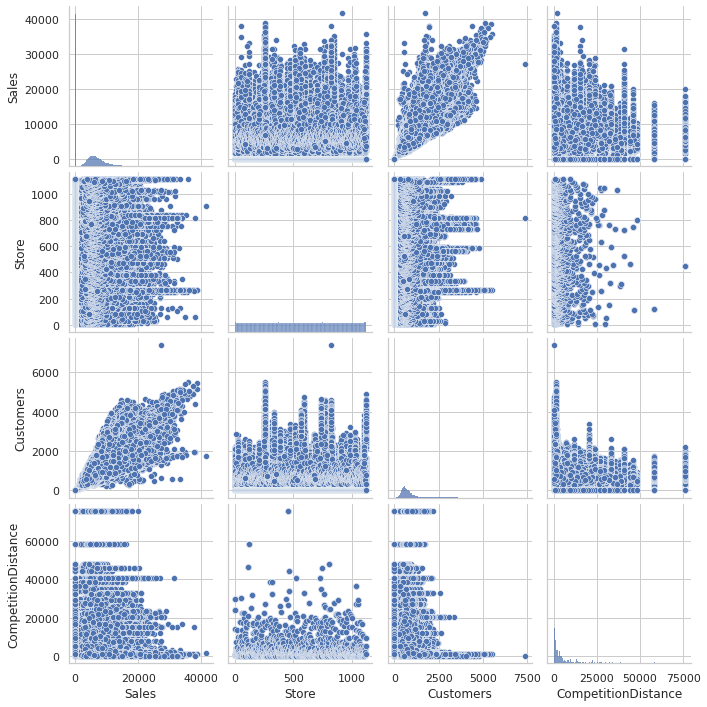

In [ ]:

sns.pairplot(Plot)

#Outliers


**Handling outliers**
* Start with our target variable as it is the most important variable.
* Then we will explore other Numerical based variables like Customers, competition distance and all.
* This Data set have some geniune values which seems as outliers. so we will be working on only those values which is very impotant  to remove and removal of those will does not affect or data set.

**1** **Sales and Customers**

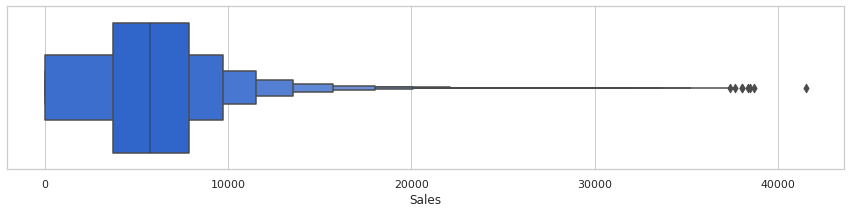

In [ ]:

sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')
sns.boxenplot(x=df["Sales"],color='#175ee3')

# plt.grid(False)
# plt.xlabel('')
# plt.title('Sread of Sales',size=15)
# ax = plt.gca()
# for spine in ax.spines.values():
#    spine.set_visible(False)

* Customers is the only feature which has linear relation with Sales.Hence it is the most important for our linear regression.
* Hence regulate the feature in such a way that it would provide accurate result.

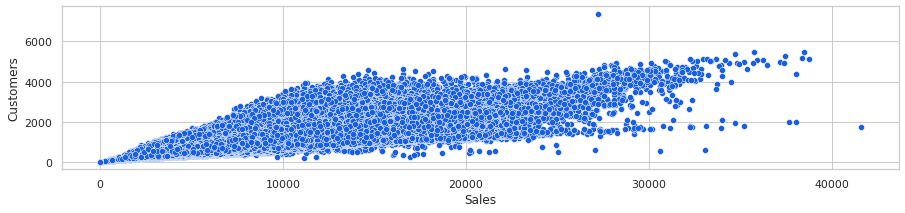

In [ ]:
sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')  
sns.scatterplot(x="Sales",y="Customers",data=df,color='#175ee3')
plt.show()

In [ ]:
#Rows with Sales above 25k
df_mask=df.loc[(df['Sales']>=35000) & (df["Customers"]<2000)]
df_mask


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,Day
44393,909,1,41551,1721,1,0,0,0,a,c,1680.0,9.0,2013.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,6,22
424086,57,1,38037,1970,1,1,0,0,d,c,420.0,6.0,2014.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2014,6,16
627220,261,1,37646,1964,1,1,0,0,d,c,15340.0,4.0,2015.0,1,39.0,2009.0,"Jan,Apr,Jul,Oct",2013,12,16
627801,842,1,35154,1796,1,1,0,0,d,c,1200.0,11.0,2007.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2013,12,16


**Obervation:-**
We can drop the sales datapoints which are greater than 35k as they are very less percentage of the dataset and are probably outliers for our Algo.


**Drop Outliers**


In [ ]:
#Drop selected value above 
df.drop(df_mask.index,inplace=True)




**2** **Customers**

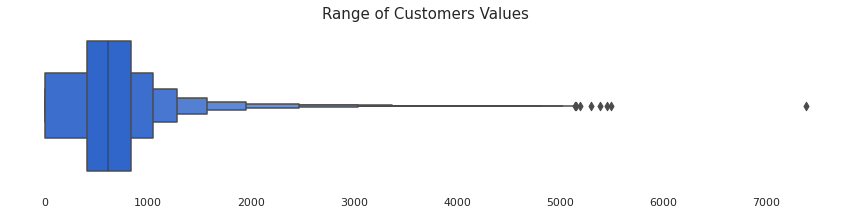

In [ ]:
sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')
sns.boxenplot(x=df['Customers'],color='#175ee3')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
  spine.set_visible(False)

In [ ]:
#Customers above 5000
df_mask2=df.loc[(df['Customers']>=5000) & (df["Sales"]<30000)]

df_mask2

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,Day
993496,817,2,27190,7388,1,1,0,0,a,a,140.0,3.0,2006.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,22


**Obervation:-**We can drop the Customers datapoints which are greater than 2500 as they are very less percentage of the dataset and are probably outliers.

**Drop Outliers**

In [ ]:
#Drop Cutomers value above 2500
df.drop(df_mask2.index,inplace=True)

**CompetitionOpenSinceYear**
* In real world scenario it is possible to have these values as exceptionals.But for the ML algos and they may create problem.
* This feature seems to have an outlier for the model. 
* Hence we remove only those values Removal of which does not affect the original data. And also which are at extreme point.

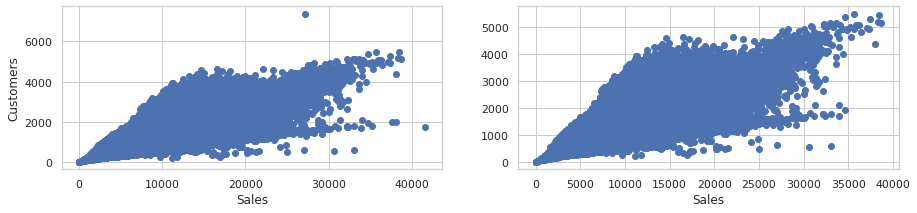

In [ ]:
# Scatter plot
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df0['Sales'], df0['Customers'])
ax2.scatter(df['Sales'], df['Customers'])

# x-axis label
ax1.set_xlabel('Sales')
ax2.set_xlabel('Sales')
 
# y-axis label
ax1.set_ylabel('Customers')
plt.show()

**CompetitionOpenSinceYear**

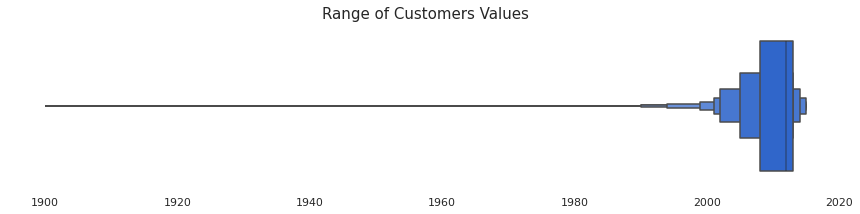

In [ ]:
sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')
sns.boxenplot(x=df['CompetitionOpenSinceYear'],color='#175ee3')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [ ]:
#Drop CompetitionOpenSinceYear value below 1980
df.drop(df.loc[df['CompetitionOpenSinceYear'] < 1980].index,inplace=True)

**CompetitionDistance**

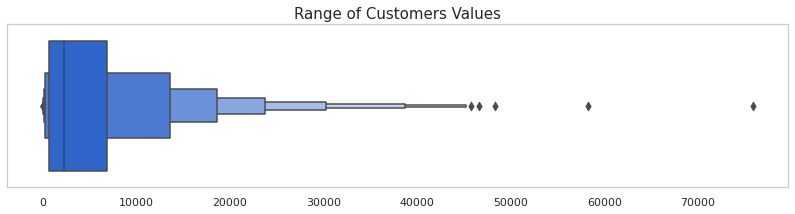

In [190]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionDistance'],color='#175ee3')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
# for spine in ax.spines.values():
#   spine.set_visible(False)

In [ ]:
#Drop CompetitionOpenSinceYear value below 1980
df.drop(df.loc[df['CompetitionDistance'] > 55000].index,inplace=True)

**Conclusion:-**
* We have converted the data type in usable formate.
* hadled the missing values.
* Deal with categorical values.
* Handled outliers 

**GREAT ! we can move head towards understanding our Data set for further exploration using visualization** 

In [ ]:
df.shape

(1013620, 20)

#**EDA With Data Visualization**

#Improving Target Variable (Sales)


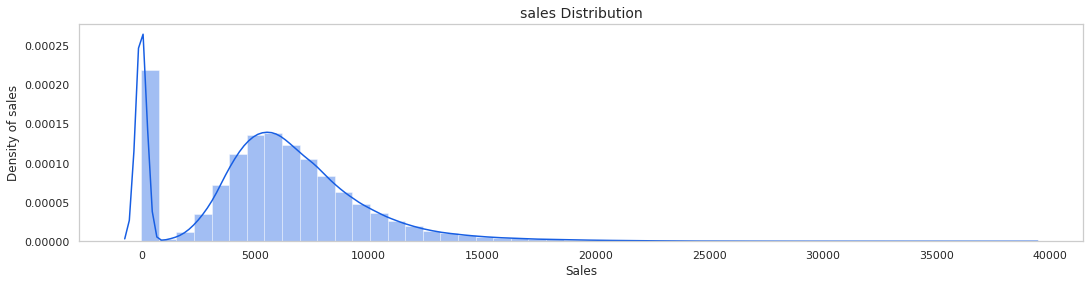

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#Distribution of Sales
sns.set_theme(palette='autumn',rc={'figure.figsize': (18,6)},style='whitegrid')
sns.distplot(x=df['Sales'],color='#175ee3')
plt.title('sales Distribution',size=14)
plt.ylabel('Density of sales',size=12)
plt.xlabel('Sales',size=12)
plt.grid(False)

plt.show()  

**Observation:-**Lots of zero sales is disturbing our Target Variable.
When stores are closed the sales value is zero hence we have deal with the zero sales.

In [ ]:
df.shape

(1013620, 20)

**Relation of Sales with store Open and Close** 

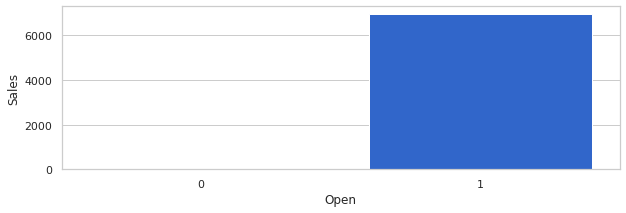

In [ ]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,3)},style='whitegrid')
sns.barplot(x = 'Open',y = 'Sales',data = df0,color='#175ee3')
 
# Show the plot
plt.show()

**conclusion:-**
* When stores are closed there is no sales so we dont have any exceptions hence remove rows when stores are closed.
*  where there is no record of sales even without any holidays. We can remove these data points too as they are an exceptional case
* Further we can also remove the open column from or Data set.

In [ ]:
#Drop when Sales = 0
df.drop(df.loc[(df['Sales']==0)].index,inplace=True)
print(df.shape)

(841160, 20)


In [ ]:
#Drop Open column.
# df.drop("Open",axis="columns",inplace=True)

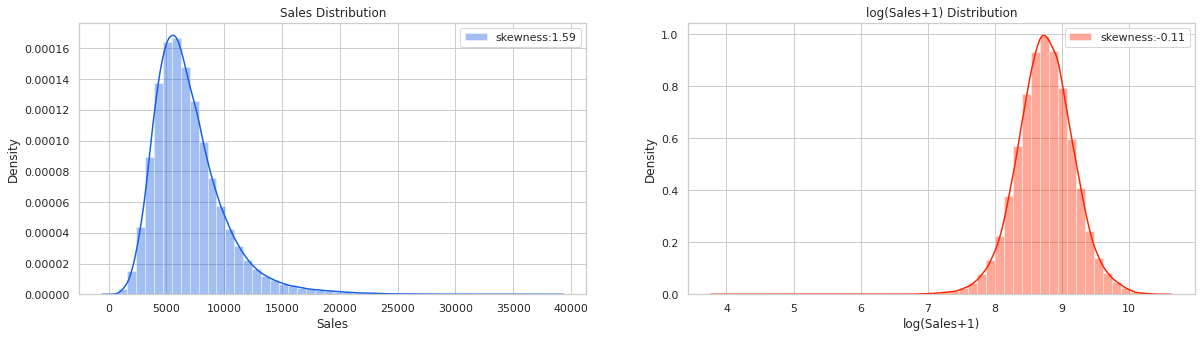

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


#Compare Distribution of Sales withot and with log tranformation after cleaning it.
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(df['Sales'],hist = True,label='skewness:{:.2f}'.format(df['Sales'].skew()),ax = ax1,color='#175ee3')
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(df['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(df['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

**Conclusion:-**
* We have turned our target variable into a normal Distribution which is one of the important Assumption for Regression model.
* **Great! Oue Target variable is ready to train and test.**

#Feature Selection for our Regression Model.

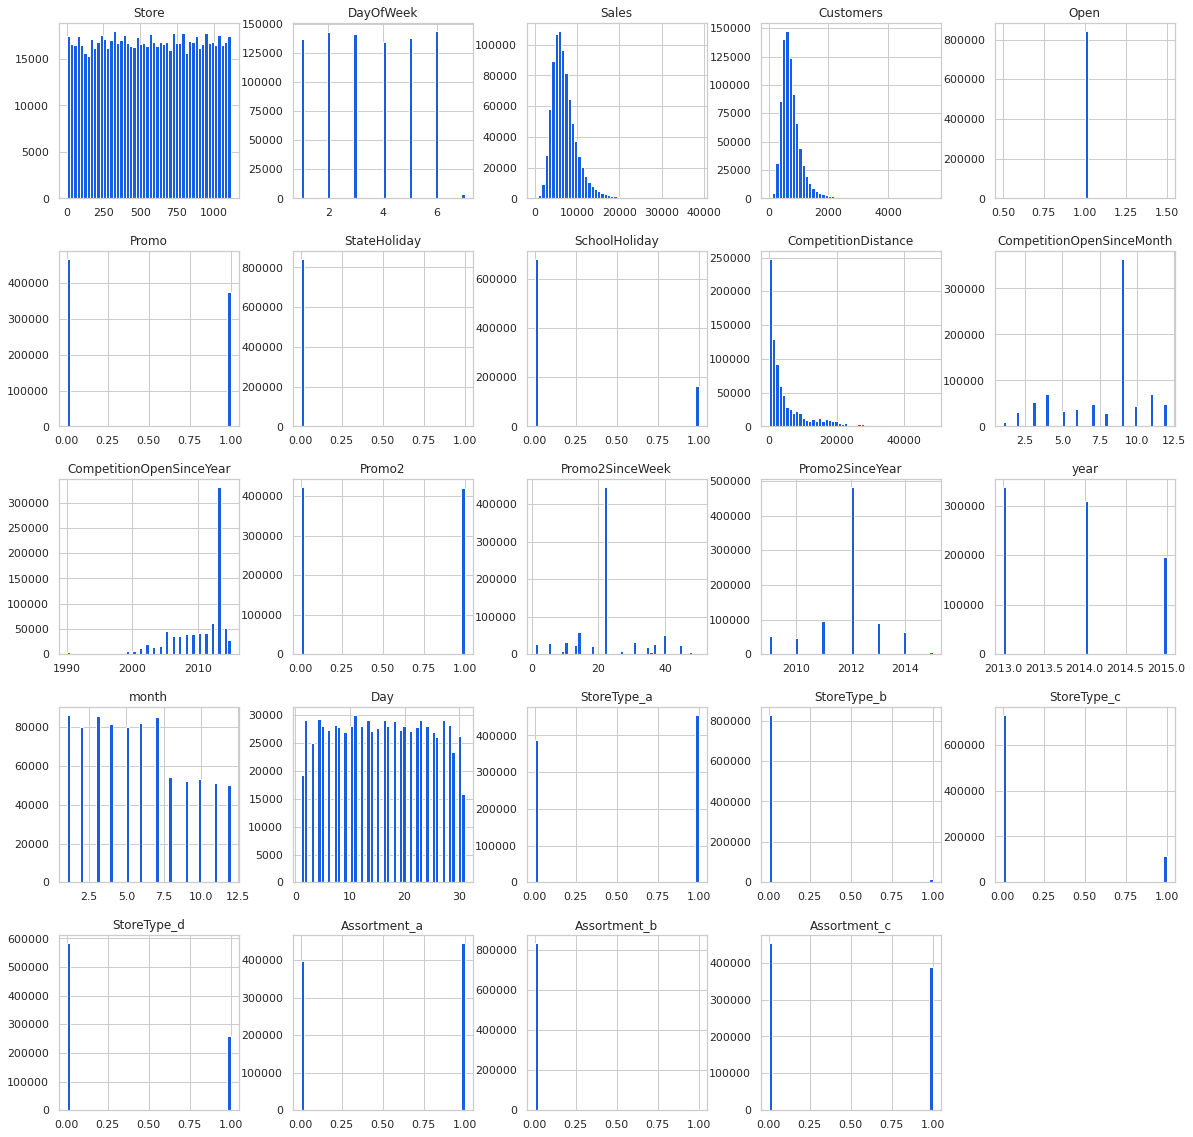

In [191]:
p = df.hist(figsize = (20,20),bins=50,color='#175ee3')

#Analysing Continuous Variable with Target Variable.

**Sales Vs Store**

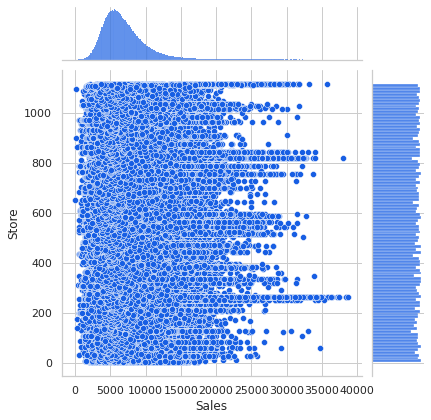

In [192]:
#join plot for store vs sales
sns.jointplot(x='Sales',y ='Store', data = df,color='#175ee3')
plt.show()

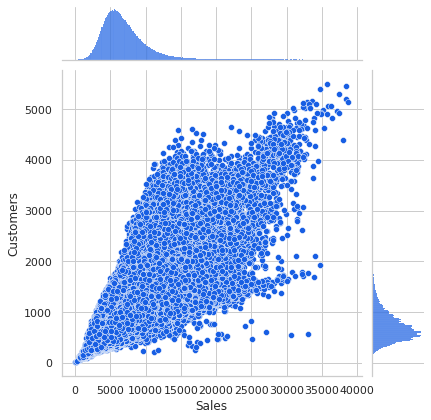

In [193]:
sns.jointplot(x='Sales',y ='Customers', data = df,color='#175ee3')
plt.show()

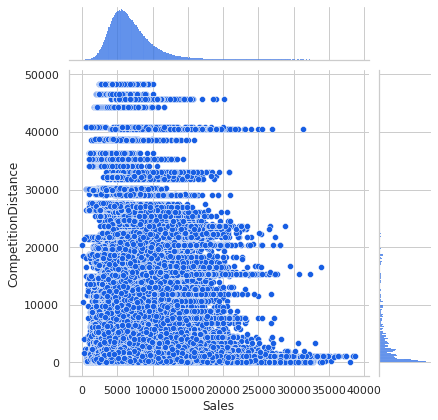

In [194]:
sns.jointplot(x='Sales',y ='CompetitionDistance', data = df,color='#175ee3')
plt.show()

**Findings:-**
* Out of all the features we have Store,Customers,CompetitionDiatance and sales(Target var) with continuous variable in our data set.
* out of all the continuous features customers feature have highest linearity and corelation with target variable(Sales).
* we can simply drop the Store feature for the Linear regression model.




#Analysing Categorical type with Target variable.

**Days of Week**
* Compare Sales and Customers during DaysOfWeek. 

**Obsevation:-**

* Sundays have minimum Sales compared to all the other days.

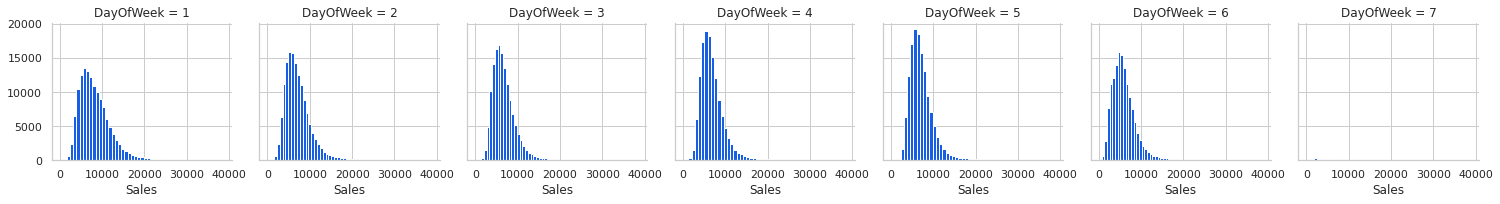

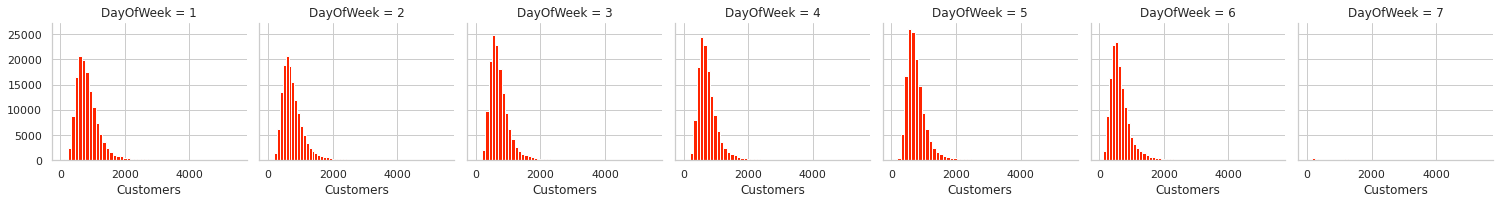

In [208]:
#DaysOfWeek Vs Sales
s = sns.FacetGrid(df, col='DayOfWeek')
s.map(plt.hist, 'Sales',bins=50,color='#175ee3')
plt.show()

c = sns.FacetGrid(df, col='DayOfWeek')
c.map(plt.hist, 'Customers',bins=50)
plt.show()

**Findings:-**
* Sundays have minimum sales records.
* Monday(1) and Friday(5) have highest sales.
* Fridays have mavimum sales records.  
* Customer feature also follow same trend.

**Year**
* compare Sales during all the years with DayOfWeek. 

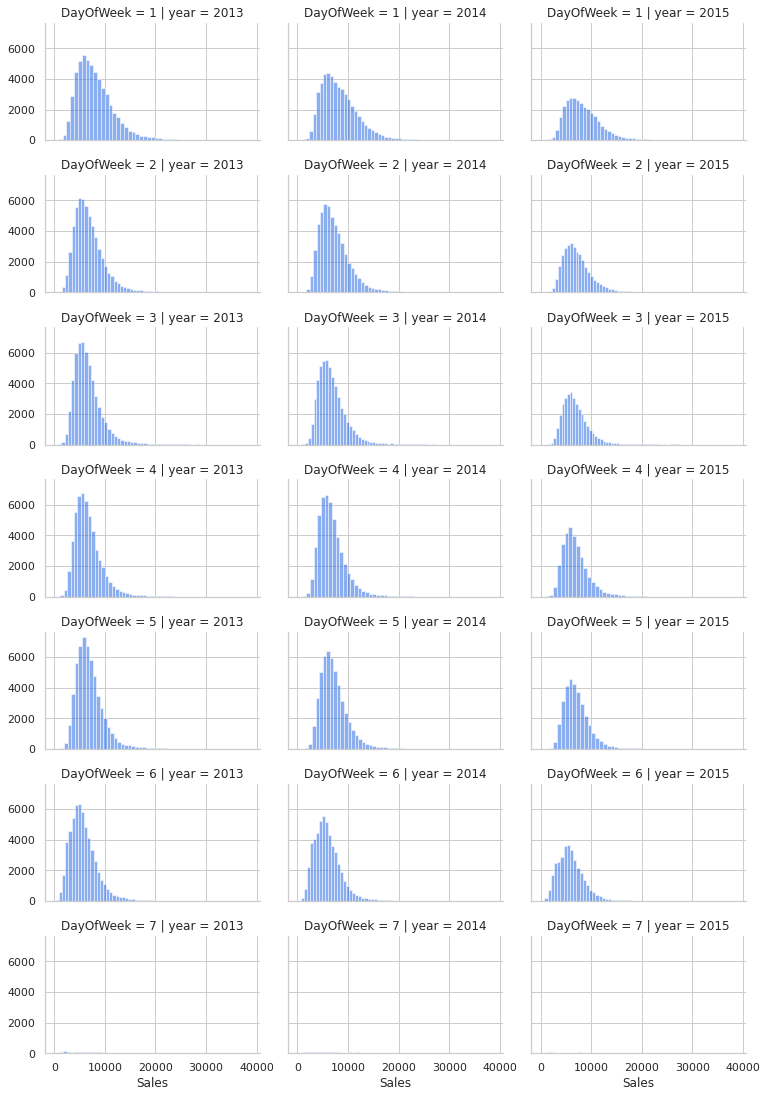

In [197]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='year', row='DayOfWeek', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Sales', alpha=.5, bins=50,color='#175ee3')
grid.add_legend();

**Findings:-**
* Sales has declined in year 2015 compare to previous years.
* we can drop the sundays as it may create unbalance in the feature DayOfWeek. 

**Effect of Promo over Sales & Customers**

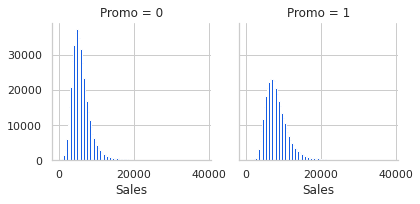

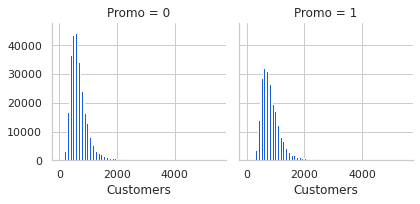

In [209]:
#Promo vs Sales
g = sns.FacetGrid(df, col='Promo')
g.map(plt.hist, 'Sales',bins=100,color='#175ee3')
plt.show()
#Promo vs Customers
g = sns.FacetGrid(df, col='Promo')
g.map(plt.hist, 'Customers',bins=100,color='#175ee3')
plt.show()

**Affect of StateHoliday SchoolHoliday over Sales**


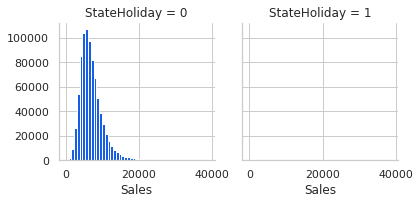

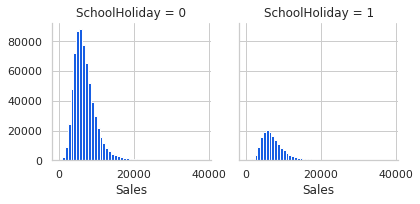

In [198]:
g = sns.FacetGrid(df, col='StateHoliday')
g.map(plt.hist, 'Sales',bins=50,color='#175ee3')
plt.show()

g = sns.FacetGrid(df, col='SchoolHoliday')
g.map(plt.hist, 'Sales',bins=50,color='#175ee3')
plt.show()

**Observation:-**
* During StateHolidays there is negligible sales records.
* But we have some Sales records even during SchoolHolidays.

**Findings:-**
* We can Eliminate StateHoliday feature from our traning model.

**Affect of CompetitionOpenSinceMonth over Sales**

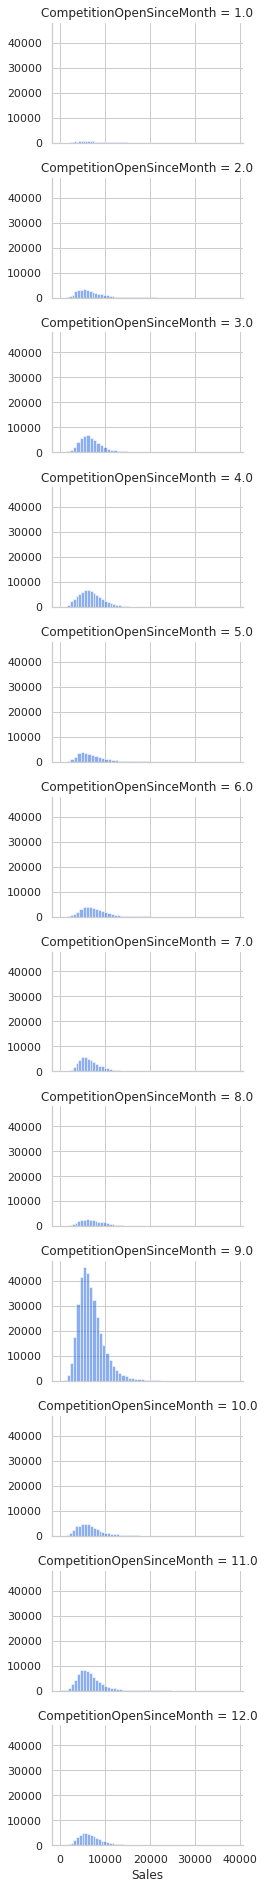

In [199]:
grid = sns.FacetGrid(df, row='CompetitionOpenSinceMonth', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Sales', alpha=.5, bins=50,color='#175ee3')
grid.add_legend();

**Observation:-**
* CompetitionOpenSinceMonth is also imbalance categorical feature.

**Promo2 vs Sales**

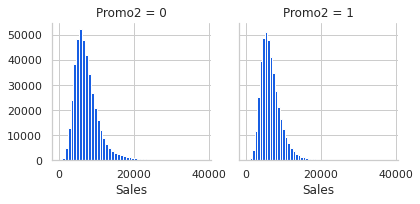

In [200]:
g = sns.FacetGrid(df, col='Promo2')
g.map(plt.hist, 'Sales',bins=50,color='#175ee3')
plt.show()

**Promo**

**Observation:-** 
* Promos atrract customers more.
* sales have impact due to customers.

**4** **State Holiday**

**5** **StoreType**

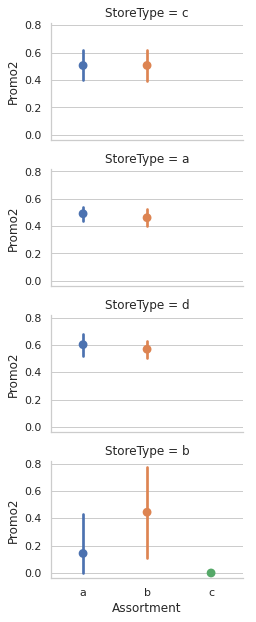

In [189]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(df1, row='StoreType', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Assortment', 'Promo2', palette='deep')
grid.add_legend()

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df, col='Assortment_a', row='StoreType_a', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Sales', alpha=.5, bins=50)
grid.add_legend();

grid = sns.FacetGrid(df, col='Assortment_b', row='StoreType_a', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Sales', alpha=.5, bins=50)
grid.add_legend();

grid = sns.FacetGrid(df, col='Assortment_b', row='StoreType_a', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Sales', alpha=.5, bins=50)
grid.add_legend();



In [174]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'year', 'month',
       'Day', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

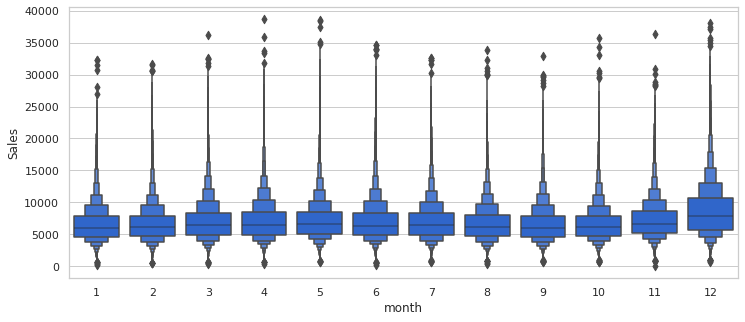

In [206]:
# boxplot = sns.boxplot(x="month", y="Sales", data=df )
# boxplot = sns.stripplot(x="month", y="Sales", data=df, marker="o", alpha=0.3, color="black")
# boxplot.axes.set_title("Distribution of Forest Fire Conditions", fontsize=16)
# boxplot.set_xlabel("Conditions", fontsize=14)
# boxplot.set_ylabel("Values", fontsize=14)
# plt.show()
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.boxenplot(x ="month",y ="Sales",data = df,color='#175ee3')
plt.show()

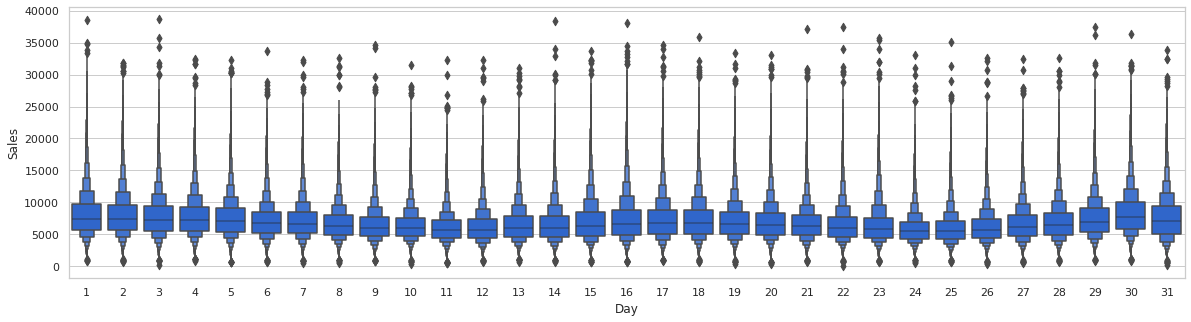

In [205]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,5)},palette='autumn')
sns.boxenplot(x ="Day",y ="Sales",data = df,color='#175ee3')
plt.show()

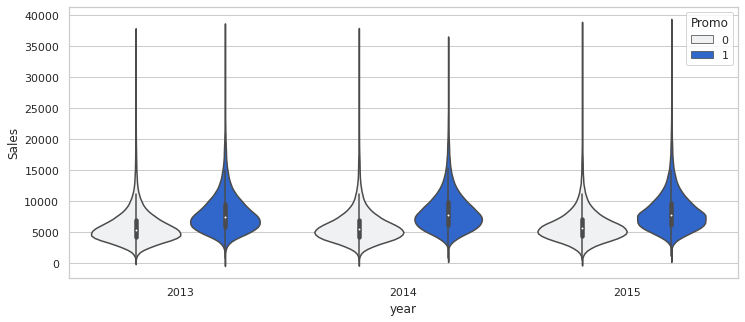

In [202]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.violinplot(x="year", y="Sales", hue="Promo", data=df,color='#175ee3')
plt.show()

In [204]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.factorplot("StoreType", "Sales", hue="Promo", data=df1, kind="bar",color='#175ee3')
plt.show()

ValueError: ignored

**Assortment**

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

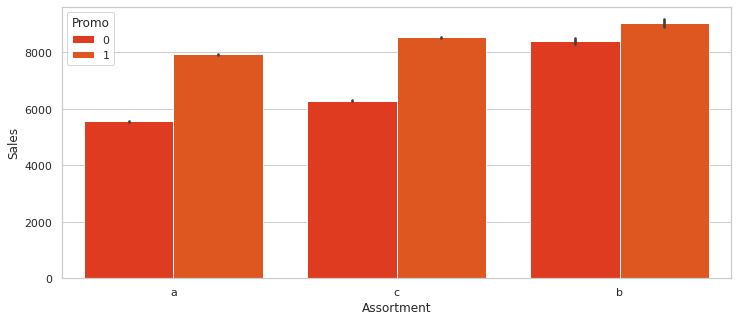

In [ ]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(12,5)},palette='autumn')
sns.barplot(x = 'Assortment',y = 'Sales',hue="Promo", data = df)
 
# Show the plot
plt.show()

Assortment has a higher edge over promo.

**One Hot Encoding for the StoreType and Assortment**
* StoreType - 4 different store models: a, b, c, d. 

* Assortment - assortment level: a = basic, b = extra, c = extended

In [173]:
#We can use Dummies we have less categories to encode.
df=pd.get_dummies(df, columns = ['StoreType',	'Assortment'])

KeyError: ignored

In [ ]:
#Corr map
correlation = df.corr()
correlation

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year,month,Day,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
Store,1.000000,0.000671,0.007670,0.034066,NaN,-0.000165,0.003235,0.000457,-0.014589,-0.037572,0.001774,0.006588,0.010075,0.025621,0.000346,0.001640,-0.000115,0.005446,-0.001389,0.060043,-0.049878,-0.011524,0.021184,0.007362
DayOfWeek,0.000671,1.000000,-0.178362,-0.096977,NaN,-0.289065,-0.001476,-0.139133,0.002520,0.000889,0.001441,-0.002849,-0.000555,0.002673,0.002103,-0.019819,0.008462,-0.004721,0.038154,-0.003037,-0.003801,-0.003517,0.027608,-0.001923
Sales,0.007670,-0.178362,1.000000,0.823631,NaN,0.368106,0.020599,0.038050,-0.039996,-0.036046,0.025527,-0.128477,0.049883,-0.008641,0.036443,0.073277,-0.051861,-0.010749,0.145017,-0.002595,-0.028839,-0.114008,0.054000,0.103508
Customers,0.034066,-0.096977,0.823631,1.000000,NaN,0.182771,0.050497,0.024368,-0.163392,-0.034677,0.009536,-0.202239,0.022466,0.044130,-0.000586,0.053532,-0.035426,0.087940,0.430624,0.051935,-0.259275,-0.038719,0.322605,-0.024841
Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,-0.000165,-0.289065,0.368106,0.182771,NaN,1.000000,0.002765,0.028879,-0.000896,-0.000511,-0.000702,-0.000508,-0.000888,-0.001470,0.024000,-0.006376,-0.126450,0.002633,-0.017904,0.002090,0.000841,0.001413,-0.012965,0.001141
StateHoliday,0.003235,-0.001476,0.020599,0.050497,NaN,0.002765,1.000000,0.012604,0.004824,0.003629,0.001365,-0.009665,-0.004491,0.005140,0.002318,0.001287,-0.007909,-0.016599,0.118069,-0.005825,-0.012254,-0.008066,0.093596,-0.010379
SchoolHoliday,0.000457,-0.139133,0.038050,0.024368,NaN,0.028879,0.012604,1.000000,-0.003409,-0.000551,-0.000133,-0.008397,-0.003297,-0.001480,-0.038695,0.118487,0.038133,0.002158,-0.003016,0.002706,-0.003451,0.002881,-0.002804,-0.002332
CompetitionDistance,-0.014589,0.002520,-0.039996,-0.163392,NaN,-0.000896,0.004824,-0.003409,1.000000,-0.046651,0.009349,-0.134200,-0.036117,-0.043139,0.000540,0.003123,-0.000419,-0.049697,-0.080210,-0.097886,0.149529,-0.135355,-0.056407,0.146652
CompetitionOpenSinceMonth,-0.037572,0.000889,-0.036046,-0.034677,NaN,-0.000511,0.003629,-0.000551,-0.046651,1.000000,0.036486,0.021132,0.007700,0.009586,-0.000664,-0.001282,0.000200,-0.027159,0.000236,-0.029525,0.051116,-0.037924,0.022598,0.033518


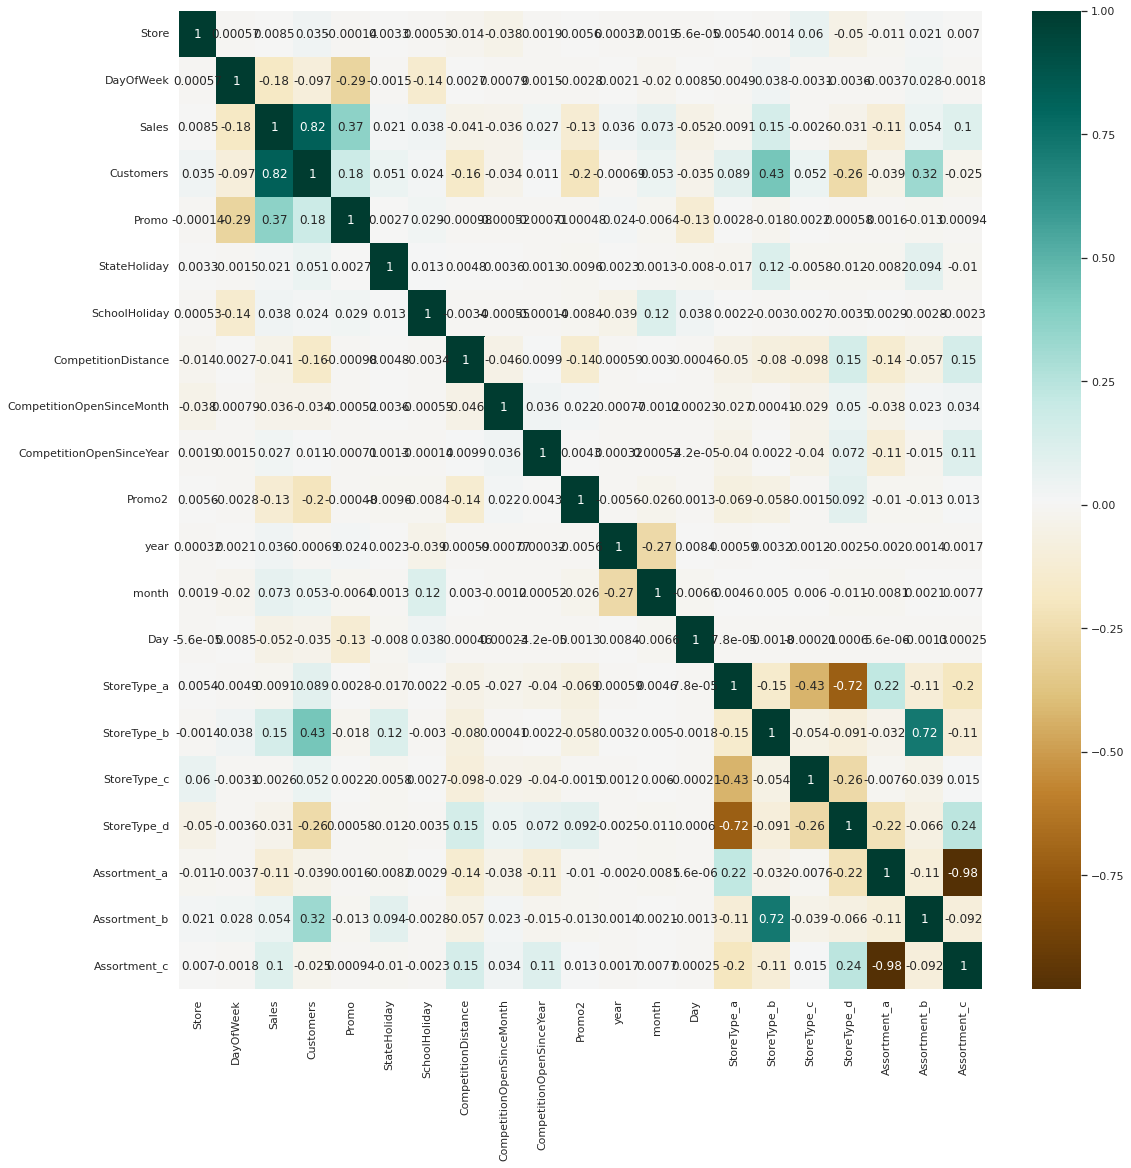

In [ ]:
# Heat Map
plt.figure(figsize=(18,18))
sns.heatmap(correlation, annot=True, linewidths=0.0, cmap='BrBG')

#Buliding a Regression Model


Linear Regression is the simplest algorithm in machine learning, it can be trained in different ways. In this notebook we will cover the following linear algorithms:

* Linear Regression
* Robust Regression
* Ridge Regression
* LASSO Regression
* Elastic Net
* Polynomial Regression
* Stochastic Gradient Descent

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#Cross validation of model
def cross_val(model):
    pred = cross_val_score(model, X_train, y_train, cv=10)
    return pred.mean()
#Evaluate matrices
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


**Train Test Split**

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Sales'],axis=1),df['Sales'], test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((670935, 20), (670935,))

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

LinearRegression()

**Model Evaluation**
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
print(LR_model.intercept_)

coeff_df = pd.DataFrame(LR_model.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

-349106.9147748409


,Coefficient
Store,-0.128291
DayOfWeek,-39.306923
Customers,7.369278
Promo,1138.706805
StateHoliday,305.973485
SchoolHoliday,30.548154
CompetitionDistance,0.029748
CompetitionOpenSinceMonth,-9.872399
CompetitionOpenSinceYear,-2.459301
Promo2,312.473902


In [ ]:
pred_df=pd.DataFrame([y_predict,y_test])
pred_df=pred_df.rename(index={0:"Real",1:"predicted"})
#Transpose the dataset
pred_df.T

,Real,predicted
0,10740.865114,15844.0
1,10733.550270,12603.0
2,6568.489131,7284.0
3,4966.945308,4818.0
4,5332.291538,5087.0
...,...,...
167729,6307.684420,7051.0
167730,10089.156685,11016.0
167731,7650.379072,6445.0
167732,7071.883635,7215.0


In [ ]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.827958735707363

In [ ]:
x_train_pred = model.predict(X_train)
r2_score(y_train, x_train_pred)

0.8286131567102344

In [ ]:
R2_2=r2_score(y_test,y_predict)
MAE2=mean_absolute_error(y_test,y_predict)
MSE2=mean_squared_error(y_test,y_predict)

print("R2_score",R2_2)
print("Mean absolute error",MAE2)
print("Mean squared error",MSE2)

R2_score 0.827958735707363
Mean absolute error 940.4566174011777
Mean squared error 1650539.4594148395


Text(0, 0.5, 'Predicted values')

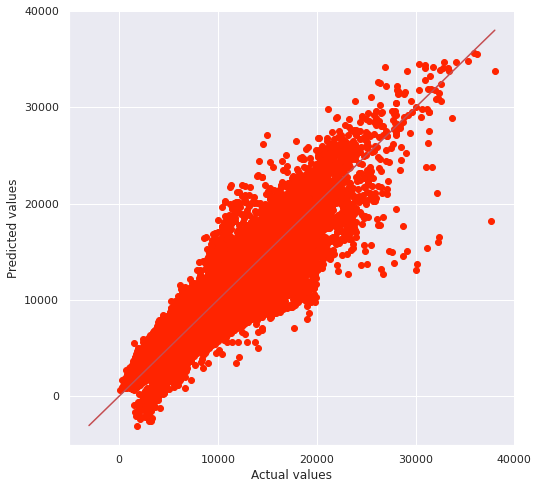

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

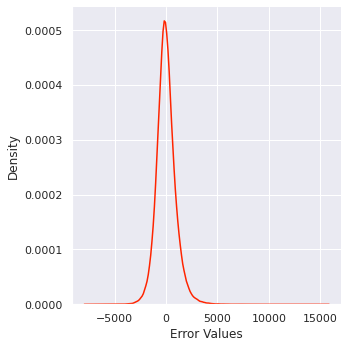

In [ ]:
#Residual Histogram

hv=pd.DataFrame({'Error Values': (y_test - y_predict)})
sns.displot(hv, x="Error Values", kind="kde")
plt.show()

**Robust Regression**

* Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process.

* One instance in which robust estimation should be considered is when there is a strong suspicion of heteroscedasticity.

* A common situation in which robust estimation is used occurs when the data contain outliers. In the presence of outliers that do not come from the same data-generating process as the rest of the data, least squares estimation is inefficient and can be biased. Because the least squares predictions are dragged towards the outliers, and because the variance of the estimates is artificially inflated, the result is that outliers can be masked. (In many situations, including some areas of geostatistics and medical statistics, it is precisely the outliers that are of interest.)

In [ ]:
from sklearn.linear_model import RANSACRegressor

RB_model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
RB_model.fit(X_train, y_train)

test_pred = RB_model.predict(X_test)
train_pred = RB_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, y_predict) , cross_val(RANSACRegressor())]], 
                             columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
# results_df = results_df.append(results_df_2, ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 1017.0748267806214
MSE: 2245285.1250017993
RMSE: 1498.4275508017727
R2 Square 0.7659664000158419
__________________________________
Train set evaluation:
_____________________________________
MAE: 1014.6167978144354
MSE: 2209512.8838963327
RMSE: 1486.4430308277317
R2 Square 0.7688632322972841
__________________________________


In [ ]:
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Robust Regression,703.649977,900113.417584,948.743072,0.906178,0.760385


#Polynomial Regression 

**Polynomial Regression**
(*Source: scikit-learn*)

* One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

* For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

y^(w,x)=w0+w1x1+w2x2
 
* If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

y^(w,x)=w0+w1x1+w2x2+w3x1x2+w4x21+w5x22
 
* The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

z=[x1,x2,x1x2,x21,x22]
 
* With this re-labeling of the data, our problem can be written

y^(w,x)=w0+w1z1+w2z2+w3z3+w4z4+w5z5
 
* We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Test set evaluation:
_____________________________________
MAE: 808.1803254147936
MSE: 1181537.0989302006
RMSE: 1086.9853259958022
R2 Square 0.8768444249247624
__________________________________
Train set evaluation:
_____________________________________
MAE: 809.2586778152876
MSE: 1181833.8670349764
RMSE: 1087.1218271357523
R2 Square 0.8763685597947922
__________________________________


In [ ]:
results_df_2

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Polynomail Regression,808.180325,1.181537e+06,1086.985326,0.876844,0


#Lasso Reg

**Models**
Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score



In [ ]:
las = LassoCV()
las.fit(X_train,y_train)

LassoCV()

In [ ]:
x_test_pred_ls = las.predict(X_test)
r2_score(y_test, x_test_pred_ls)

0.6877307515991218

In [ ]:
x_train_pred = las.predict(X_train)
r2_score(y_train, x_train_pred)

0.690479330781448

#Ridge Reg

In [ ]:
rid = RidgeCV()
rid.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [ ]:
x_test_pred_rd = rid.predict(X_test)
r2_score(y_test, x_test_pred_rd)

0.827956327183139

In [ ]:
x_train_pred = rid.predict(X_train)
r2_score(y_train, x_train_pred)

0.8286130211160245

**Elastic Net**
* A linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both. A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation. The objective function to minimize is in this case

In [ ]:
from sklearn.linear_model import ElasticNet

EN_model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
EN_model.fit(X_train, y_train)

test_pred = EN_model.predict(X_test)
train_pred = EN_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 945.4993974400155
MSE: 1699920.8177743873
RMSE: 1303.810115689546
R2 Square 0.8228115510846601
__________________________________
Train set evaluation:
_____________________________________
MAE: 943.7461600355987
MSE: 1681949.910780603
RMSE: 1296.9001159613654
R2 Square 0.8240515053570785
__________________________________


#Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

# prediction_open = model.predict(X_test)
# prediction_closed = np.zeros(combined_data_closed.shape[0])

# y_predict = np.append(prediction_open,prediction_closed)

0.9522392414612243

r2_score: 0.9522392414612243
Mean absolute error: 452.44
Root mean squared error:  676.9120587612265


Text(0, 0.5, 'Predicted values')

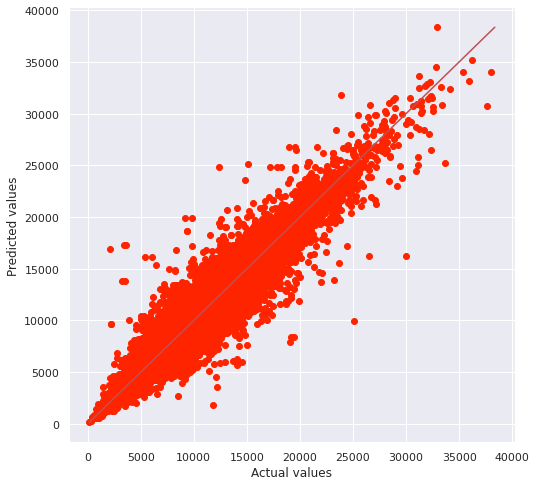

In [ ]:
# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Observation:-**
The decision tree regressor performing well compared to Linear

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train,y_train)

y_predict = random_forest_model.predict(X_test)
r2_score(y_test, y_predict)

0.9766177878601088

r2_score: 0.9766177878601088
Mean absolute error: 319.04
Root mean squared error:  473.6302597475518


Text(0, 0.5, 'Predicted values')

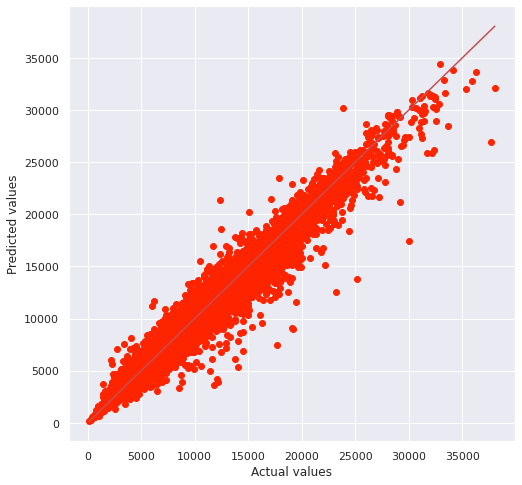

In [ ]:
# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Observation:**
Random Forest regressor had the lowest error as compared to other models, which means it is better at predicting sales than other models.

#Understanding the important features

In [ ]:
# features used
columns = list(X_train.columns)
columns

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'year',
 'month',
 'Day',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [ ]:
# getting weights of all the features used in the data
feature_importance = random_forest_model.feature_importances_
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
2,Customers,0.745717
6,CompetitionDistance,0.051717
16,StoreType_d,0.042008
3,Promo,0.033753
0,Store,0.031935
18,Assortment_b,0.019097
8,CompetitionOpenSinceYear,0.013320
7,CompetitionOpenSinceMonth,0.011939
1,DayOfWeek,0.010520
14,StoreType_b,0.008288


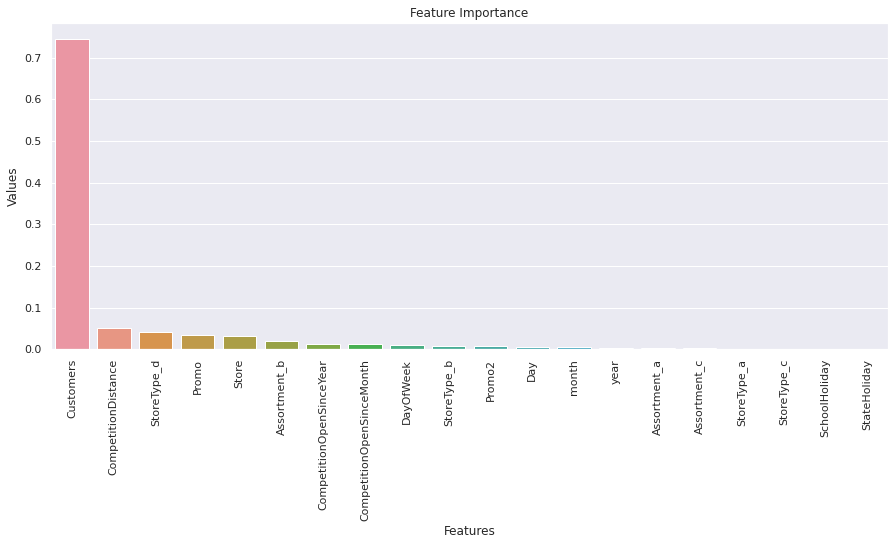

In [ ]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

**Gradient Boosting**
We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

* The average value of the target column and uses as an initial prediction every input.
* The residuals (difference) of the predictions with the targets are computed.
* A decision tree of limited depth is trained to predict just the residuals for each input.
* Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
* Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
* Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.
* The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). 
* The term "boosting" refers the general technique of training new models to improve the results of an existing model.

* To train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [ ]:
from xgboost import XGBRegressor
XGBmodel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=4)

# %%time
XGBmodel.fit(X_train, y_train)


y_predict = XGBmodel.predict(X_test)
r2_score(y_test, y_predict)

[08:16:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9061781592166223

**Feature importance**
* Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [ ]:
importance_df = pd.DataFrame({
    'feature': columns,
    'importance': XGBmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df

,feature,importance
2,Customers,0.395057
16,StoreType_d,0.125960
18,Assortment_b,0.099185
3,Promo,0.098648
14,StoreType_b,0.072344
6,CompetitionDistance,0.030385
19,Assortment_c,0.029107
1,DayOfWeek,0.023029
11,month,0.018529
9,Promo2,0.018118


#Models Comparison

In [ ]:

results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

NameError: ignored